In [41]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# samples like:  5/1∗1+4+3+2/9/4∗2/45/1∗1+4+3+2/9/4∗2/4  1 2 3 4 5 6 7 8 9 10 1 2 3 4 5 6 7 8

In [52]:
seq = '5/1∗1+4+3+2/9/4∗2/4'
seq_len = len(seq)

In [53]:
syn_dis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8]

# l/r : fraction of gates that are left/right saturated

In [54]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0
hdim = 100

In [55]:
i = 0
with open('feval-analy_d10-lstm_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['type'] != 'gates':
            continue
        t = line_json['t']
        ngates += hdim
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [56]:
ngates = ngates/seq_len
ngates

6500.0

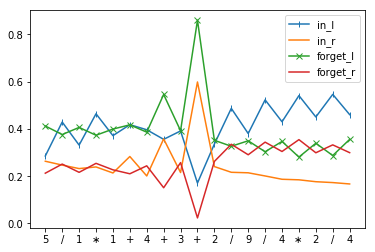

In [58]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
# plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

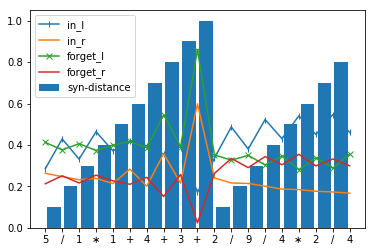

In [57]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
# plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()